In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm



In [2]:
dftrain=pd.read_csv('C:/Users/student/Documents/Senior/Spring/Capstone/Nuveen/WF_Train_round1.csv')
dftest=pd.read_csv('C:/Users/student/Documents/Senior/Spring/Capstone/Nuveen/WF_Test_round1.csv')

In [38]:
x = dftrain[[ 't12m_sales_ig_taxable', 't12m_sales_muni_bonds','t12m_sales_other', 'nuveen_t12m_sales_hy_taxable', 
             'nuveen_t12m_sales_total', 't24m_sales_int_bonds',
             't24m_sales_ig_taxable', 't24m_sales_muni_bonds', 'nuveen_t24m_sales_hy_taxable', 'nuveen_t12m_reds_other',
             't24m_reds_int_bonds', 'nuveen_t24m_reds_ig_taxable', 'mf_aum_int_bonds', 'mf_aum_other', 
             'mf_aum_total', 't12m_netsl_hy_taxable',
             'nuveen_t12m_netsl_hy_taxable', 't24m_netsl_other', 't24m_netsl_us_equity']]
y = dftrain['nuveen_t3m_sales_total']

In [39]:
## minimize the sum of squared residuals
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                  
Dep. Variable:     nuveen_t3m_sales_total   R-squared (uncentered):                   0.388
Model:                                OLS   Adj. R-squared (uncentered):              0.386
Method:                     Least Squares   F-statistic:                              160.5
Date:                    Wed, 22 Mar 2023   Prob (F-statistic):                        0.00
Time:                            19:21:01   Log-Likelihood:                         -67066.
No. Observations:                    4824   AIC:                                  1.342e+05
Df Residuals:                        4805   BIC:                                  1.343e+05
Df Model:                              19                                                  
Covariance Type:                nonrobust                                                  
                                   coef    std err          t      P>|t|      [0

In [40]:
Xtest = dftest[['t12m_sales_ig_taxable', 't12m_sales_muni_bonds','t12m_sales_other', 'nuveen_t12m_sales_hy_taxable', 
             'nuveen_t12m_sales_total', 't24m_sales_int_bonds',
             't24m_sales_ig_taxable', 't24m_sales_muni_bonds', 'nuveen_t24m_sales_hy_taxable', 'nuveen_t12m_reds_other',
             't24m_reds_int_bonds', 'nuveen_t24m_reds_ig_taxable', 'mf_aum_int_bonds', 'mf_aum_other', 
             'mf_aum_total', 't12m_netsl_hy_taxable',
             'nuveen_t12m_netsl_hy_taxable', 't24m_netsl_other', 't24m_netsl_us_equity']]
ytest = dftest[['nuveen_t3m_sales_total']]



In [41]:
yhat2 = results.predict(Xtest)

In [42]:
print(yhat2)

2401    4.593517e+06
4012    2.370553e+06
106     2.256275e+06
3600    2.077785e+06
2773    2.039227e+06
            ...     
3737   -4.674679e+05
10     -5.201560e+05
1073   -5.294563e+05
3629   -6.662500e+05
572    -7.015505e+05
Length: 4824, dtype: float64


In [43]:
dftest['yhat2'] = yhat2

In [44]:

dftest = dftest.sort_values(by = 'yhat2', ascending = False)


In [45]:
dftest['Quintile'] = pd.qcut(dftest['yhat2'], 5, labels=[i for i in range (5, 0, -1)])

In [46]:
print(dftest['Quintile'])

2401    1
4012    1
106     1
3600    1
2773    1
       ..
3737    5
10      5
1073    5
3629    5
572     5
Name: Quintile, Length: 4824, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]


In [47]:
dftest['Quintile'] = dftest['Quintile'].astype('int')

In [48]:
dftest['Quintile'].value_counts().reset_index(name='count')


,index,count
0,2,965
1,5,965
2,1,965
3,4,965
4,3,964


In [49]:

 dftest.groupby('Quintile')[''].mean()

Quintile
1    177772.281782
2     34171.728570
3      5518.650954
4      5096.057368
5     12983.860342
Name: nuveen_t3m_sales_total, dtype: float64

In [50]:

buyers = pd.crosstab(dftest['Quintile'], dftest['total'], normalize='index')



In [51]:
print(buyers)

total            0         1
Quintile                    
1         0.470466  0.529534
2         0.696373  0.303627
3         0.812241  0.187759
4         0.896373  0.103627
5         0.867358  0.132642


In [52]:
 dftest.groupby('Quintile')['nuveen_t3m_sales_total'].mean()

Quintile
1    177772.281782
2     34171.728570
3      5518.650954
4      5096.057368
5     12983.860342
Name: nuveen_t3m_sales_total, dtype: float64

<AxesSubplot:title={'center':'nuveen_t12m_netsl_hy_taxable by Quintile'}, xlabel='Quintile'>

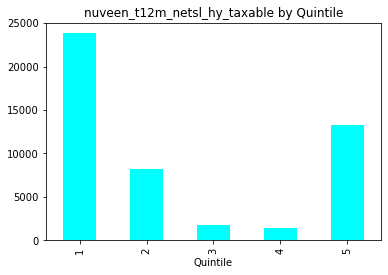

In [63]:
dftest.groupby(by = "Quintile")['nuveen_t12m_netsl_hy_taxable'].mean().plot(kind = "bar", title="nuveen_t12m_netsl_hy_taxable by Quintile", color='cyan')
